# TP1_Question2

2. [35pts] Dans cette question nous allons évaluer **la qualité de différentes méthodes de reconstruction phylogénétique** sur des données de RFAM.

Utiliser l’alignement FASTA (gaped) de la famille 
RF0001 : https://rfam.xfam.org/family/RF00001#tabview=tab2 
ainsi que d’une autre famille
au choix. 

Attention, toutes les familles ne fonctionnent pas car il manque
de l’information.

(a) [5pts] Faire une fonction

lire_fasta(\<fichier_ali>) qui prend en entrée le chemin d’un fichier
d’alignement FASTA et retourne un alignement de type AlignIO
de Biopython (https://biopython.org/wiki/AlignIO). 

Le nom des
séquences doit être modifié. Il est dans le format X/Y et il ne faut
garder que le X.

 S’il se retrouve plusieurs fois, en garder une au hasard.
 
Indice: attribut .id. L’alignement de la fin doit avoir au plus 25
séquences, les choisir au hasard.

In [1]:
!pip install biopython

     |████████████████████████████████| 2.3MB 6.9MB/s 


In [165]:
from Bio import AlignIO
from Bio import SeqIO
from io import StringIO
import re
from random import randint

In [166]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

def lire_fasta(fichier_ali):
  alignment = AlignIO.read(open(fichier_ali), "fasta")
  ali_Dict = {}          # S’il se retrouve plusieurs fois, en garder une au hasard.
                        # Donc, employer le dictionnaire
  while len(ali_Dict) < 25:
    i = randint(0,len(alignment)-1) # choisir l'index des séquences au hasard.
    ali_ID = re.sub(r"\/\d*-\d*", "", alignment[i].id)   
    #Il est dans le format X/Y et il ne faut garder que le X.
    ali_Dict[ali_ID] = str(alignment[i].seq)
    # dictionary ----> MultipleSeqAlignment object 
  seqRecord_list = []
  for key, value in ali_Dict.items():
    record = SeqRecord(Seq(value), id=key)
    seqRecord_list.append(record)
    #retourner un alignement de type AlignIO de Biopython
  align = MultipleSeqAlignment(seqRecord_list,
                              annotations={"tool": "demo"})
  return align


In [5]:
data = lire_fasta('RF00001.afa.txt')
print(data)

Alignment with 25 rows and 230 columns
--GGGUGC-GA-U-C-AU-ACC----AG-C-G-U-U---AA---...CCU M10433.1
--CCUGAC-GA-C-C-AU-AGC----GA-G-G-U-G---GU---...GGC M35569.1
--GUCGGU-GG-U-U-UU-AGC----GG-A-GCG-G---GG---...ACA Z50077.1
------GU-GG-A-U-UA-GGC----GA-A-G-A-G---GU---...--- Z11820.1
--UUCGGC-GG-C-C-AU-AGC----GA-G-A-G-G---GA---...GAC M16169.1
------GC-GG-C-C-AG-GGC----GG-A-G-G-G---GA---...--- L27343.1
--UUCGGU-GG-U-U-UU-GGC----GA-A-G-G-G---GA---...GAC M55343.1
--GCUUG--GG-C-G-AG-AGU----AG-U-A-C-U---AG---...UCC AY544288.1
--CUUGGU-CA-C-C-AU-AGC----GU-C-A-G-A---UA---...AG- L37447.1
--UUCGGC-GG-C-C-AU-AGC----GA-G-A-G-G---GA---...GAC M60936.1
--CCUGGU-GG-C-C-AU-UGC----GA-G-G-G-C---CC---...GGU M76577.1
--UUUGGU-AU-U-U-AU-UGC----AU-A-G-G-A---GA---...AGU X75364.1
--AGGAAC-GG-C-C-AU-ACC----AC-G-C-C-G---AU---...CU- D16558.1
--GUAGAC-GG-C-C-AU-CUU----AG-G-C-U-G---AA---...ACA EF661646.1
--ACAUAC-GG-C-C-AU-AAC----UA-U-C-A-G---AU---...GU- AY924923.1
--GCA-GC-GG-C-C-AU-AGC----GG-U-G-G-G---GC---...GCC L271

(b) [5pts] Faire une fonction

matrice_distance(\<ali>) qui prend un alignement tel que produit
par la fonction précédente et retourne une matrice de distance. 

Pour
ce faire, utiliser DistanceCalculator de Biopython avec le modèle
identity (voir https://biopython.org/docs/1.75/api/Bio.Phylo.TreeConstruction.html).

In [6]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO

In [7]:
def matrice_distance(ali):
  calculator = DistanceCalculator('identity')
  dm = calculator.get_distance(ali)
  return dm


In [ ]:
data = lire_fasta('RF00001.afa.txt')
md = matrice_distance(data)
print(md)
type(md)

Z50060.1	0
K03168.1	0.30869565217391304	0
X06848.1	0.26521739130434785	0.17391304347826086	0
AF516460.1	0.33913043478260874	0.32173913043478264	0.33478260869565213	0
AY544489.1	0.30000000000000004	0.28260869565217395	0.29130434782608694	0.29565217391304344	0
AB109769.1	0.16956521739130437	0.29130434782608694	0.27826086956521734	0.32173913043478264	0.26086956521739135	0
AY007786.1	0.31739130434782614	0.19565217391304346	0.23478260869565215	0.28695652173913044	0.25217391304347825	0.29130434782608694	0
X16688.1	0.34347826086956523	0.20434782608695656	0.19565217391304346	0.34347826086956523	0.27391304347826084	0.29565217391304344	0.23478260869565215	0
X12624.1	0.28695652173913044	0.15652173913043477	0.20869565217391306	0.30000000000000004	0.24347826086956526	0.29130434782608694	0.18695652173913047	0.22173913043478266	0
AL096764.11	0.28695652173913044	0.19999999999999996	0.24347826086956526	0.33913043478260874	0.24782608695652175	0.27826086956521734	0.22608695652173916	0.28695652173913044	0

Bio.Phylo.TreeConstruction.DistanceMatrix

(c) [10pts] Faire une fonction

arbre_nj(\<mat_dist>) qui à partir d’une matrice de distance retourne l’arbre NJ dans une string en format NEWICK voir https://biopython.org/wiki/Phylo.

In [8]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Phylo

In [9]:
def arbre_nj(mat_dist):
  #Constructeur pour les arbres
  constructor = DistanceTreeConstructor()
  tree_nj = constructor.nj(mat_dist)
  # write the information of tree in the "newick"format 
  tree_nj_newick = tree_nj.format("newick")

  return tree_nj_newick



In [ ]:
data = lire_fasta('RF00001.afa.txt')
md = matrice_distance(data)
arbre = arbre_nj(md)
print(arbre)

(((M76575.1:0.08754,(L37451.1:0.07817,(AF088897.1:0.03871,L37447.1:0.05259)Inner9:0.01313)Inner12:0.01789)Inner18:0.01611,((((Z50059.1:0.03428,(X55254.1:0.01599,M33888.1:0.01009)Inner3:0.01137)Inner6:0.00915,M27245.1:0.03650)Inner7:0.04779,((X72495.1:0.07818,X62865.1:0.09138)Inner10:0.03383,(X02729.1:0.12850,((M10435.1:0.08179,(EF175853.1:0.07505,AF237320.1:0.05974)Inner1:0.04429)Inner4:0.02479,(K01050.1:0.11855,(X02031.1:0.06616,X54477.1:0.09906)Inner2:0.03580)Inner8:0.01081)Inner11:0.02109)Inner13:0.01250)Inner15:0.01351)Inner19:0.00820,(X57791.1:0.09870,(X12884.1:0.05751,AJ251080.1:0.04683)Inner14:0.01217)Inner16:0.01463)Inner20:0.01261)Inner22:0.00427,(AJ131588.1:0.09544,M34759.1:0.10021)Inner17:0.01500,(X00757.1:0.11604,(X02260.1:0.04720,X02022.1:0.03106)Inner5:0.04266)Inner21:0.00946)Inner23:0.00000;



(d) [5pts] Faire une fonction

melange_newick(<ali>) qui retourne un arbre en format newick tel
que fait précédemment, mais avec les noms mélangés aléatoirement.

In [10]:
import random

In [11]:
def melange_newick(data):
  # mélanger les sequences aléatoirement.
  data_original = list(data)
  random.shuffle(data_original)
  data_shuffle = MultipleSeqAlignment(data_original)

  #print(data_shuffle)

  from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
  calculator = DistanceCalculator('identity')
  constructor = DistanceTreeConstructor(calculator, 'nj')
  tree2 = constructor.build_tree(data_shuffle)
  #print(tree2)

  # write the information of tree  in the "newick"format 
  tree_nj2_newick = tree2.format("newick")
  return tree_nj2_newick



In [ ]:
data = lire_fasta('RF00001.afa.txt')
md = matrice_distance(data)
arbre = arbre_nj(md)
print(arbre)
arbre2 = melange_newick(data)
print(arbre2)

(((M36307.1:0.08346,X16688.1:0.11654)Inner18:0.02017,((AF516423.1:0.09166,(EF175854.1:0.07039,DQ776911.1:0.06439)Inner3:0.03443)Inner16:0.03279,((D00059.1:0.08994,X06103.1:0.09267)Inner17:0.01801,(((D13620.1:0.04604,(Z50073.1:0.04472,X55255.1:0.05093)Inner8:0.01048)Inner9:0.04303,(M35165.1:0.11137,(X05525.1:0.08399,((((X05517.1:0.00826,X01555.1:0.00913)Inner4:0.00137,X01556.1:0.00732)Inner5:0.02478,(X16193.1:0.02144,X02030.1:0.02639)Inner6:0.01544)Inner7:0.03653,(X02629.1:0.00000,AJ131593.1:0.00000)Inner1:0.10694)Inner10:0.00433)Inner11:0.01092)Inner12:0.01140)Inner13:0.02496,(M34911.1:0.10542,M36186.1:0.12066)Inner14:0.01810)Inner15:0.03291)Inner19:0.01074)Inner21:0.00510)Inner22:0.00320,((M10817.1:0.01433,J01012.1:0.03350)Inner2:0.05533,X52047.1:0.09902)Inner20:0.01078,AF158095.1:0.09792)Inner23:0.00000;

(((M36307.1:0.08346,X16688.1:0.11654)Inner18:0.02017,((AF516423.1:0.09166,(DQ776911.1:0.06439,EF175854.1:0.07039)Inner3:0.03443)Inner16:0.03279,((X06103.1:0.09267,D00059.1:0.08994)I

(e) [10pts]
Faire une fonction

eval_ete(fichier_ali) qui prend en entrée le chemin d’un fichier
d’alignement FASTA et va faire 10 fois:

• Créer un arbre newick avec 25 séquences, ainsi que celui avec les
noms mélangés.

• Créer le vrai arbre de NCBI pour ces 25 séquences Indice: http:
//etetoolkit.org/docs/latest/tutorial/tutorial_ncbitaxonomy.
html

• Calculer le ratio entre la distance Robinson-Foulds de l’arbre NJ
et le vrai arbre NCBI divisé par la distance Robinson-Foulds de l’arbre mélangé et le vrai arbre NCBI.

Faire 2 figures, une par famille RFAM. Chaque figure représente les
ratios des 25 simulations. Discuter en maximum une page.

In [167]:
!pip install ete3

In [307]:
# (0) lire un fichier d’alignement FASTA, choisir 25 séquences au hasard.
myData = lire_fasta('RF00001.afa.txt')

In [299]:
myData = lire_fasta('RF00002.afa.txt')

In [308]:
#(1) Créer le vrai arbre de NCBI pour ces 25 séquences

# 1.1) obtenir les ID de NCBI, mettre des ID_alignement et ID_NCBI_tax dans un dictionnaire.

def getTaxIDs(data):
  from Bio import Entrez
  Entrez.email = 'wanlinli2018@gmail.com'
  tax_ids_dict = {}
  for align in data:
    #print(align.id)
    tax_ids_dict[align.id] = Entrez.read(Entrez.elink(db='taxonomy', 
                                            dbfrom='nuccore', 
                                            id=align.id))[0]['LinkSetDb'][0]['Link'][0]['Id']
  return tax_ids_dict

In [309]:
ids_dict = getTaxIDs(myData)
print("ids_dict",ids_dict)

ids_ncbi_tax = list(ids_dict.values())
print("ids_ncbi_tax",ids_ncbi_tax)

ids_dict {'Z50058.1': '76726', 'K03161.1': '5342', 'X52301.1': '1144275', 'M16531.1': '275', 'X02013.1': '1402', 'X02023.1': '1404', 'U01070.1': '743971', 'M34762.1': '414', 'X02028.1': '1393', 'AJ510153.1': '1247', 'X02251.1': '28169', 'U42342.1': '6304', 'Z49275.1': '40145', 'AY034724.1': '112518', 'M34910.1': '2221', 'X55264.1': '33889', 'AF237322.1': '58927', 'M16530.1': '2288', 'M35167.1': '120', 'X15179.1': '689', 'AF330837.1': '3702', 'X61066.1': '2148', 'D90253.1': '929563', 'X00072.1': '5281', 'X06854.1': '5331'}
ids_ncbi_tax ['76726', '5342', '1144275', '275', '1402', '1404', '743971', '414', '1393', '1247', '28169', '6304', '40145', '112518', '2221', '33889', '58927', '2288', '120', '689', '3702', '2148', '929563', '5281', '5331']


In [310]:
# La première fois il faut télécharger la DB

from ete3 import NCBITaxa
ncbi = NCBITaxa()

In [311]:
# 1.2) Arbre des taxonomies ETE3
from ete3 import Tree
from ete3 import NCBITaxa

def creeNCBIArbre(ids_dict):
  ncbi = NCBITaxa()
  # obtenir les ID 
  tax_ids_ncbi = list(ids_dict.values())
  tree_ncbi = ncbi.get_topology(tax_ids_ncbi)
  #print(tree_ncbi)
  tree_ncbi_nwk = tree_ncbi.write()
  return tree_ncbi_nwk

In [312]:
tree_ncbi_nwk = creeNCBIArbre(ids_dict)
tree_ncbi_nwk

'((((((40145:1,5342:1)1:1,5331:1)1:1,5281:1)1:1,6304:1)1:1,(3702:1,(112518:1,58927:1)1:1)1:1)1:1,((((28169:1,689:1)1:1,414:1)1:1,1144275:1)1:1,((2148:1,743971:1)1:1,(76726:1,33889:1)1:1,(((1404:1,1402:1)1:1,1393:1)1:1,1247:1)1:1,275:1)1:1,929563:1,120:1)1:1,(2221:1,2288:1)1:1);'

In [313]:
# (3.1) Créer un arbre newick avec ces 25 séquences, changer ID_alignement à ID_NCBI_tax
#ainsi que celui avec les noms mélangés
def changerID(data):
  # change the id
  data2 = data
  for item in data2:
    item.id = str(ids_dict[item.id])    # Très très important, assurer le type d'ID,str()
  return data2

dataWithIDtax = changerID(myData)
dataWithIDtax

<<class 'Bio.Align.MultipleSeqAlignment'> instance (25 records of length 230) at 7f1912bc88d0>

In [314]:
print(dataWithIDtax)

Alignment with 25 rows and 230 columns
--GUCGGU-GG-U-U-AU-GGC----GG-A-G-G-G---GG---...ACA 76726
--AUCCAC-GG-C-C-AU-AGG----AC-U-G-U-G---AA---...UU- 5342
--UCGGGU-GG-C-A-AU-GUC----GG-A-G-G-G---GU---...GAU 1144275
--CCUCGG-GA-C-C-AU-AGC----GG-A-G-G-G---GA---...GGG 275
--UUUGGU-GG-C-G-AU-AGC----GA-A-G-A-G---GU---...AGC 1402
--UCUGGU-GG-C-G-AU-AGC----GA-A-G-A-G---GU---...GGC 1404
-----AGU-AA-C-A-AU-AGC----AA-A-A-G-G---GA---...--- 743971
---UUGGU-GA-C-C-AU-AGC----GA-G-C-G-U---GA---...AA- 414
--UCUGGU-GA-U-G-AU-GGC----GG-A-G-G-G---GA---...GGC 1393
--UGUCGU-GU-U-A-AU-UCC----GA-U-G-A-G---GU---...UG- 1247
--CUUGGC-GA-C-C-AU-AGC----GU-U-G-U-G---GA---...GGC 28169
--GAUUAC-GA-C-C-AU-ACC----GC-G-U-U-G---AA---...UCU 6304
--AUCCAC-GG-C-C-AU-AGG----AC-U-C-U-G---AA---...UU- 40145
--GGAUGC-GA-U-C-AU-ACC----CG-C-A-C-U---AA---...UCC 112518
--UUUGGC-GG-C-C-AU-AGC----GG-C-G-G-G---GC---...UCU 2221
--UGCGGU-GG-U-G-AU-AGU----GG-U-G-G-G---GA---...CAA 33889
--AGGGGC-GU-C-G-UU--GC----GG-U-G-G-A---AA---...UCC 58927

In [315]:
calculator = DistanceCalculator('identity')
mat_dist = calculator.get_distance(dataWithIDtax)
#Constructeur pour les arbres
constructor = DistanceTreeConstructor()
tree_nj = constructor.nj(mat_dist)
#print(tree_nj)
  # write the information of tree in the "newick"format 
tree_nj_nwk = tree_nj.format("newick")
print(tree_nj_nwk)

(((((689:0.00217,28169:0.00217)Inner5:0.06458,414:0.08107)Inner12:0.02722,((1393:0.06834,(1404:0.02948,1402:0.02704)Inner11:0.02297)Inner17:0.01082,((120:0.10593,275:0.08103)Inner15:0.01337,(1144275:0.05723,(33889:0.09607,76726:0.04740)Inner10:0.02755)Inner16:0.00673)Inner18:0.00643)Inner19:0.00688)Inner21:0.00565,(929563:0.07717,(2221:0.11304,(2288:0.13860,((58927:0.07160,(3702:0.08424,112518:0.08533)Inner3:0.02188)Inner6:0.04502,(6304:0.10838,(5281:0.04126,(5331:0.04135,(40145:0.01862,5342:0.01616)Inner1:0.01517)Inner2:0.03048)Inner4:0.04325)Inner7:0.01306)Inner8:0.02136)Inner9:0.02127)Inner13:0.01899)Inner20:0.00700)Inner22:0.00172,(2148:0.10846,743971:0.12632)Inner14:0.01187,1247:0.11422)Inner23:0.00000;



In [316]:
#Créer le arbre newick qui a les noms mélangés.
tree_nj_nomMelange_nwk = melange_newick(dataWithIDtax)
print(tree_nj_nomMelange_nwk)

(((929563:0.07717,(2221:0.11304,(2288:0.13860,((58927:0.07160,(3702:0.08424,112518:0.08533)Inner3:0.02188)Inner6:0.04502,(6304:0.10838,(5281:0.04126,(5331:0.04135,(5342:0.01616,40145:0.01862)Inner1:0.01517)Inner2:0.03048)Inner4:0.04325)Inner7:0.01306)Inner8:0.02136)Inner9:0.02127)Inner13:0.01899)Inner20:0.00700,((414:0.08107,(689:0.00217,28169:0.00217)Inner5:0.06458)Inner12:0.02722,(((120:0.10593,275:0.08103)Inner15:0.01337,(1144275:0.05723,(33889:0.09607,76726:0.04740)Inner10:0.02755)Inner16:0.00673)Inner18:0.00643,(1393:0.06834,(1404:0.02948,1402:0.02704)Inner11:0.02297)Inner17:0.01082)Inner19:0.00688)Inner21:0.00565)Inner22:0.00172,1247:0.11422,(2148:0.10846,743971:0.12632)Inner14:0.01187)Inner23:0.00000;



In [317]:
# (3.1) Calculer la distance Robinson-Foulds de l’arbre NJ et le vrai arbre NCBI
from ete3 import Tree

arbre_nj = Tree(tree_nj_nwk,format=1)
arbre_nj_nomMelange = Tree(tree_nj_nomMelange_nwk,format=1)
arbre_ncbi = Tree(tree_ncbi_nwk,format=1)

rf_nj_ncbi, maxrf, commonleaves, partst1, partst2, _ , _= arbre_nj.robinson_foulds(arbre_ncbi,unrooted_trees=True)

print("RF distance is %s over a total of %s" %(rf_nj_ncbi, maxrf))
print("Partitions in arbre_ncbi that were not found in arbre_nj:", partst1 - partst2)
print("Partitions in arbre_nj that were not found in arbre_ncbi:", partst2 - partst1)


RF distance is 14 over a total of 40
Partitions in arbre_ncbi that were not found in arbre_nj: {(('112518', '2288', '3702', '40145', '5281', '5331', '5342', '58927', '6304'), ('1144275', '120', '1247', '1393', '1402', '1404', '2148', '2221', '275', '28169', '33889', '414', '689', '743971', '76726', '929563')), (('112518', '1247', '2148', '2221', '2288', '3702', '40145', '5281', '5331', '5342', '58927', '6304', '743971', '929563'), ('1144275', '120', '1393', '1402', '1404', '275', '28169', '33889', '414', '689', '76726')), (('112518', '1247', '2148', '2221', '2288', '28169', '3702', '40145', '414', '5281', '5331', '5342', '58927', '6304', '689', '743971', '929563'), ('1144275', '120', '1393', '1402', '1404', '275', '33889', '76726')), (('112518', '120', '1247', '1393', '1402', '1404', '2148', '2221', '2288', '275', '28169', '3702', '40145', '414', '5281', '5331', '5342', '58927', '6304', '689', '743971', '929563'), ('1144275', '33889', '76726')), (('112518', '2221', '2288', '3702', '401

In [ ]:
#arbre_nj.compare(arbre_ncbi,unrooted=True)

In [318]:
# (3.2) Calculer la distance Robinson-Foulds de l’arbre mélangé et le vrai arbre NCBI
rf_nomMelange_nj, maxrf, commonleaves, partst1, partst2, _ , _= arbre_nj_nomMelange.robinson_foulds(arbre_ncbi,unrooted_trees=True)

print("RF distance is %s over a total of %s" %(rf_nomMelange_nj, maxrf))
print("Partitions in arbre_ncbi that were not found in arbre_nj_nomMelange:", partst1 - partst2)
print("Partitions in arbre_nj_nomMelange that were not found in arbre_ncbi:", partst2 - partst1)


RF distance is 14 over a total of 40
Partitions in arbre_ncbi that were not found in arbre_nj_nomMelange: {(('112518', '2288', '3702', '40145', '5281', '5331', '5342', '58927', '6304'), ('1144275', '120', '1247', '1393', '1402', '1404', '2148', '2221', '275', '28169', '33889', '414', '689', '743971', '76726', '929563')), (('112518', '1247', '2148', '2221', '2288', '3702', '40145', '5281', '5331', '5342', '58927', '6304', '743971', '929563'), ('1144275', '120', '1393', '1402', '1404', '275', '28169', '33889', '414', '689', '76726')), (('112518', '1247', '2148', '2221', '2288', '28169', '3702', '40145', '414', '5281', '5331', '5342', '58927', '6304', '689', '743971', '929563'), ('1144275', '120', '1393', '1402', '1404', '275', '33889', '76726')), (('112518', '120', '1247', '1393', '1402', '1404', '2148', '2221', '2288', '275', '28169', '3702', '40145', '414', '5281', '5331', '5342', '58927', '6304', '689', '743971', '929563'), ('1144275', '33889', '76726')), (('112518', '2221', '2288', '

In [319]:
#Calculer le ratio entre la distance Robinson-Foulds de l’arbre NJ 
#et le vrai arbre NCBI divisé par la distance Robinson-Foulds de
#l’arbre mélangé et le vrai arbre NCBI.

ratio_RF = rf_nj_ncbi/rf_nomMelange_nj
ratio_RF

1.0

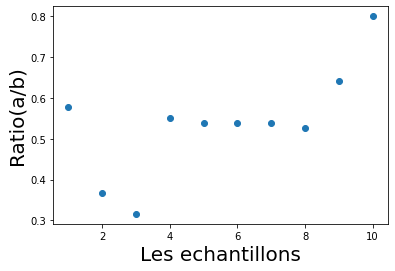

In [321]:
# Faire la figure
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0.579,0.368,0.316,0.550,0.538,0.538,0.538,0.526,0.641,0.800])
plt.figure()

plt.scatter(x,y)

plt.xlabel("Les echantillons",fontsize = 20)
plt.ylabel("Ratio(a/b)",fontsize=20)


plt.savefig('ratio_rf_RF00001_ratio_a_b')


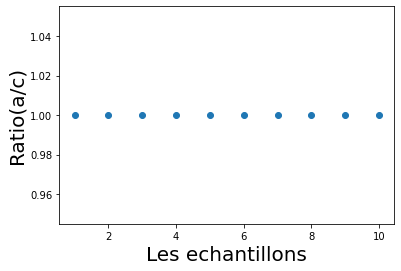

In [322]:
# Faire la figure
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([1,1,1,1,1,1,1,1,1,1])
plt.figure()

plt.scatter(x,y)

plt.xlabel("Les echantillons",fontsize = 20)
plt.ylabel("Ratio(a/c)",fontsize=20)


plt.savefig('ratio_rf_RF00001_ratio_a_c')
